# Python Interactive Maps with Folium

# Notes

* folium is similar to ipyleaflet but different in some functionaly and syntax
* for install instructions go to python.org, python package index, search for folium

# Data Files

* indiana_outline_map.geojson
* sales_region1.geojson
* sales_region2.geojson
* sales_region3.geojson
* geojson_indianacounties.geojson
* indiana_population_by_county.csv
* flags_of_africa.png (from Wikipedia)

# Documentation

In [8]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

# Imports

In [9]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds

# Basic Maps

In [10]:
folium.Map?

In [11]:
# basic map
# zoom and pan

folium.Map()

In [12]:
# map with location start point, zoom level, size, and distance scale
# zoom in by using a larger number for zoom_start

map1 = folium.Map(location=[39.739192, -104.990337], zoom_start=12, width=500, height=300, control_scale=True)
map1

In [13]:
# another way to change map size

from branca.element import Figure

fig = Figure(width=500, height=300)
fig.add_child(map1)
fig

# Save Map

In [14]:
# map
map2 = folium.Map(location=[39.739192, -104.990337], zoom_start=8)

# put in path.html
map2.save('/Users/ryannoonan/Desktop/map2.html')

# Map Types

In [15]:
# show map types using ipywidgets

# widget
select_widget=ipywidgets.Select(
    options=['Open Street Map', 'Terrain', 'Toner', 'Watercolor', 'Positron', 'Dark Matter'],
    value='Open Street Map',
    description='Map Type:',
    disabled=False)

# widget function
def select(map_type):
    if map_type == 'Open Street Map':
        display(folium.Map(location=[39.739192, -104.990337], zoom_start=12, height=500))
    if map_type == 'Terrain':
        display(folium.Map(location=[39.739192, -104.990337], tiles='Stamen Terrain', zoom_start=12, height=400))
    if map_type == 'Toner':
        display(folium.Map(location=[39.739192, -104.990337], tiles='Stamen Toner', zoom_start=12, height=400))
    if map_type == 'Watercolor':
        display(folium.Map(location=[39.739192, -104.990337], tiles='Stamen Watercolor', zoom_start=12, height=400))
    if map_type == 'Positron':
        display(folium.Map(location=[39.739192, -104.990337], tiles='CartoDB Positron', zoom_start=12, height=400))
    if map_type == 'Dark Matter':
        display(folium.Map(location=[39.739192, -104.990337], tiles='CartoDB Dark_Matter', zoom_start=12, height=400))
        
# interaction between widgets and function    
ipywidgets.interact(select, map_type=select_widget)

interactive(children=(Select(description='Map Type:', options=('Open Street Map', 'Terrain', 'Toner', 'Waterco…

<function __main__.select(map_type)>

In [16]:
# show map types using layer control

# map
map_layer_control = folium.Map(location=[38, -98], zoom_start=2)

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_layer_control)

# add layer control to show different maps
folium.LayerControl().add_to(map_layer_control)

# display map
map_layer_control

In [17]:
# mini map, scroll zoom toggle button, full screen

# map
map_with_mini = folium.Map(location=(39, -100), zoom_start=7)

# plugin for mini map
minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
map_with_mini.add_child(minimap)

# add scroll zoom toggler to map
plugins.ScrollZoomToggler().add_to(map_with_mini)

# add full screen button to map
plugins.Fullscreen(position='topright').add_to(map_with_mini)

# display map
map_with_mini

# Markers

In [18]:
folium.Marker?

In [19]:
# geocode address and place marker on map

# map
map_zoo = folium.Map(location=[32.744524, -117.150302], zoom_start=14)

# get location information for address
address = geocoder.osm('2920 Zoo Dr, San Diego, CA 92101')

# address latitude and longitude
address_latlng = [address.lat, address.lng]

# add marker to map
folium.Marker(address_latlng, popup='San Diego Zoo', tooltip='click').add_to(map_zoo)

# display map
map_zoo

In [20]:
# airports dataframe using vega_datasets
airports = vds.airports()
airports = airports[:25]
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [21]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
map_airports = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations
for (index, row) in airports.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']], 
                  popup=row.loc['name'] + ' ' + row.loc['city'] + ' ' + row.loc['state'], 
                  tooltip='click').add_to(map_airports)
    
# display map    
map_airports

In [ ]:
for (index, row) in airports.iterrows():
    # print(row.loc['name'])
    # print(index,row['name'])
    print(index,row)

In [23]:
# markers with apply function

# map
map_airports2 = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations using apply
airports.apply(lambda row: folium.Marker(location=[row['latitude'], row['longitude']],
                                         popup=row['name']).add_to(map_airports2), axis=1)

# display map
map_airports2                                                

In [24]:
airports.apply?

In [25]:
# multiple markers using dictionary

markers_dict = {'Los Angeles': [34.041008, -118.246653], 
                'Las Vegas': [36.169726, -115.143996], 
                'Denver': [39.739448, -104.992450], 
                'Chicago': [41.878765, -87.643267], 
                'Manhattan': [40.782949, -73.969559]}

# create map
map_cities = folium.Map(location=[41, -99], zoom_start=4)

# plot locations
for i in markers_dict.items():
    folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
    print(i)

# display map    
map_cities

('Los Angeles', [34.041008, -118.246653])
('Las Vegas', [36.169726, -115.143996])
('Denver', [39.739448, -104.99245])
('Chicago', [41.878765, -87.643267])
('Manhattan', [40.782949, -73.969559])


# Custom Markers

In [26]:
folium.Icon?

In [27]:
# search for 'font awesome' icons to see examples

# map
map_cm_fa = folium.Map(location=[38, -98], zoom_start=4)

# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(color='green', icon='bolt', prefix='fa')).add_to(map_cm_fa)

# display map
map_cm_fa

In [28]:
# search for 'glyphicon bootstrap' icons to see examples

# map
map_cm_glyphicon = folium.Map(location=[38, -98], zoom_start=4)

# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(icon='glyphicon-plane', prefix='glyphicon')).add_to(map_cm_glyphicon)

# display map
map_cm_glyphicon

In [29]:
# multiple custom markers

# dataframe with custom marker names
cm_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                      'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                      'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                      'icon': ['bicycle', 'car', 'bus', 'truck', 'motorcycle']})
cm_df

,city,latitude,longitude,icon
0,Los Angeles,34.041008,-118.246653,bicycle
1,Las Vegas,36.169726,-115.143996,car
2,Denver,39.739448,-104.992450,bus
3,Chicago,41.878765,-87.643267,truck
4,Manhattan,40.782949,-73.969559,motorcycle


In [30]:
# map
map_cm_multiple = folium.Map(location=[38, -98], zoom_start=4)

# add markers to map
# for loop with itertuples (experiment that appears to work well)
# can also use iterrows or dataframe apply
for i in cm_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude], 
                  popup=i.city,
                  icon=folium.Icon(icon=i.icon, prefix='fa')).add_to(map_cm_multiple)

# display map    
map_cm_multiple

In [63]:
for i in cm_df.itertuples():
    print(i)
    # print(i.city)

Pandas(Index=0, city='Los Angeles', latitude=34.041008, longitude=-118.246653, icon='bicycle')
Pandas(Index=1, city='Las Vegas', latitude=36.169726, longitude=-115.143996, icon='car')
Pandas(Index=2, city='Denver', latitude=39.739448, longitude=-104.99245, icon='bus')
Pandas(Index=3, city='Chicago', latitude=41.878765, longitude=-87.643267, icon='truck')
Pandas(Index=4, city='Manhattan', latitude=40.782949, longitude=-73.969559, icon='motorcycle')


In [32]:
# enumerate markers

# data
cm_enum_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                           'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                           'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                           'icon_num': [1, 2, 3, 4, 5]})

# map
map_enum_icons = folium.Map([38, -98], zoom_start=4)

# icons using plugins.BeautifyIcon
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.city,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_enum_icons)

# display map    
map_enum_icons

In [33]:
cm_enum_df

,city,latitude,longitude,icon_num
0,Los Angeles,34.041008,-118.246653,1
1,Las Vegas,36.169726,-115.143996,2
2,Denver,39.739448,-104.992450,3
3,Chicago,41.878765,-87.643267,4
4,Manhattan,40.782949,-73.969559,5


In [34]:
plugins.BeautifyIcon?

# Circle Markers

In [35]:
# map
map_circle = folium.Map(location=[38, -98], zoom_start=4)

# radius of the circle in meters
folium.Circle(radius=10000, location=[38, -98], color='green').add_to(map_circle)

# circle of a fixed size with radius specified in pixels
folium.CircleMarker(location=[39, -105], radius=25, color='blue', fill_color='yellow').add_to(map_circle)

# display map
map_circle

# Plot Route

In [36]:
# route

# map
map_plot_route = folium.Map(location=[38, -98], zoom_start=4)

# route_locs = ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan']
# can use list of lists or list of tuples
route_lats_longs = [[34.041008,-118.246653],
                    [36.169726,-115.143996], 
                    [39.739448,-104.992450], 
                    [41.878765,-87.643267], 
                    [40.782949,-73.969559]]

# add route to map
folium.PolyLine(route_lats_longs).add_to(map_plot_route)

# display map
map_plot_route

In [37]:
# ant path route
# uses import - from folium import plugins

# map
map_ant_route = folium.Map(location=[38, -98], zoom_start=4)

# add ant path route to map
plugins.AntPath(route_lats_longs).add_to(map_ant_route)

# display map
map_ant_route

# Overlay GeoJSON Layers

In [38]:
# use a link or file
# use geojson.io to create custom geojson files
# can also use folium Draw control to create geojson files (example below)
# convert shapefiles to geojson using QGIS

# map
map_geojson = folium.Map(location=[39.77, -86.15], zoom_start=7)

# add geojson file to map
folium.GeoJson('indiana_outline_map.geojson', name='geojson indiana').add_to(map_geojson)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

# Subgroups with GeoJSON

In [41]:
# map
map_with_subgroups = folium.Map(location=[39.77, -86.15], zoom_start=7)

# all subgroups
all_subgroups = folium.FeatureGroup(name='all sales regions')
map_with_subgroups.add_child(all_subgroups)

# subgroup 1
sales_region1 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 1')
map_with_subgroups.add_child(sales_region1)

# subgroup 2
sales_region2 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 2')
map_with_subgroups.add_child(sales_region2)

# subgroup 3
sales_region3 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 3')
map_with_subgroups.add_child(sales_region3)

# pull in geojson layers and add to map
folium.GeoJson('sales_region1.geojson').add_to(sales_region1)
folium.GeoJson('sales_region2.geojson').add_to(sales_region2)
folium.GeoJson('sales_region3.geojson').add_to(sales_region3)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(map_with_subgroups)

# display map
map_with_subgroups

# Choropleth Map

In [42]:
folium.Choropleth?

In [43]:
# more examples for choropleth maps in the documentation

import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('geojson_indiana_counties.geojson') as f:
    geojson_counties = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in geojson_counties['features']:
    i['id'] = i['properties']['NAME_L']
    
# load data associated with geo_json
pop_df = pd.read_csv('indiana_population_by_county.csv')
    
# map    
map_choropleth = folium.Map(location=[39.77, -86.15], zoom_start=7)

# choropleth
folium.Choropleth(
    geo_data=geojson_counties,
    name='choropleth',
    data=pop_df,
    columns=['County', 'Population'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

In [ ]:
geojson_counties

In [45]:
pop_df.head()

,County,State,Population
0,Adams,Indiana,35636
1,Allen,Indiana,375351
2,Bartholomew,Indiana,82753
3,Benton,Indiana,8653
4,Blackford,Indiana,11930


# Heat Map

In [46]:
# use import geocoder

# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

map_heatmap = folium.Map([40, -99], tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap

In [47]:
plugins.HeatMapWithTime?

In [48]:
# heat map over time

# data
# take note of data format needed for heat map with time (using plugins.HeatMapWithTime?)
heatmap_time_data = (np.random.random((100,20,2)) + np.array([[39, -98]])).tolist()

# dates
heatmap_time_dates = [d.strftime('%Y-%m-%d') for d in pd.date_range('20160101', periods=len(heatmap_time_data))]

# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=6)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

In [ ]:
heatmap_time_data

# Latitude and Longitude Tool

In [50]:
# map
map_lat_long = folium.Map(location=[38, -98], zoom_start=4)

# add latitude and longitude tool to map
map_lat_long.add_child(folium.LatLngPopup())

# display map
map_lat_long

# Measure Control

In [51]:
# map
map_measure = folium.Map([40, -100], zoom_start=4)

# measure control
measure_control = plugins.MeasureControl(position='topleft', 
                                         active_color='red', 
                                         completed_color='red', 
                                         primary_length_unit='miles')

# add measure control to map
map_measure.add_child(measure_control)

# display map
map_measure

In [52]:
plugins.MeasureControl?

# Dual Map

In [53]:
# dual map
map_dual = plugins.DualMap(location=[40, -98], tiles=None, zoom_start=4)

# map tiles
folium.TileLayer('Stamen Terrain').add_to(map_dual)
folium.TileLayer('CartoDB Positron').add_to(map_dual)

# add layer control to maps
folium.LayerControl().add_to(map_dual)

# display map(s)
map_dual

# Draw

In [54]:
# map
map_draw = folium.Map(location=[40, -99], zoom_start=4)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=True)

# add draw tools to map
draw.add_to(map_draw)

# display map
map_draw

In [55]:
plugins.Draw?

# Overlay Image

In [56]:
# map
# map of Africa flags from Wikipedia
map_img_overlay = folium.Map([2,22], zoom_start=3, tiles='CartoDB Positron')

# image to overlay on map
img_overlay = folium.raster_layers.ImageOverlay(name='flags of Africa', 
                                                image='flags_of_africa.png',
                                                # bounds - [[lat_min, lon_min], [lat_max, lon_max]]
                                                bounds=[[-38, -28], [40, 60]],
                                                opacity=0.5,
                                                # controls layer order
                                                zindex=1)
# add image to map
img_overlay.add_to(map_img_overlay)

# layer control to click layer on or off
folium.LayerControl().add_to(map_img_overlay)

# display map
map_img_overlay

# Charts in Popup

In [57]:
seattle_weather = vds.seattle_weather()
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


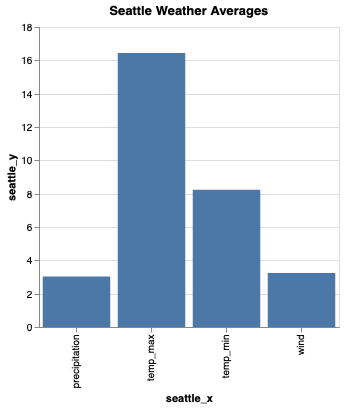

In [59]:
# embed this chart into a popup/tooltip
# altair or other libraries (vega) may need to be installed
# if you install altair while notebook is open, close and reopen everything

import altair
altair.renderers.enable('notebook')

sw_means = pd.DataFrame({'seattle_x': ['precipitation', 'temp_max', 'temp_min', 'wind'],
                         'seattle_y': [seattle_weather.precipitation.mean(),
                                       seattle_weather.temp_max.mean(),
                                       seattle_weather.temp_min.mean(),
                                       seattle_weather.wind.mean()]})

sw_bar = altair.Chart(sw_means, width=300).mark_bar().encode(
    x='seattle_x',
    y='seattle_y').properties(title='Seattle Weather Averages')

sw_bar

In [60]:
# embed seattle weather data in marker corresponding to location

# folium.features.VegaLite creates a Vega-Lite chart element
vega = folium.features.VegaLite(sw_bar, width='100%', height='100%')

# create map
map_sw = folium.Map(location=[47.606322, -122.332575])

# create marker on the map, with optional popup text or Vincent visualization
sw_marker = folium.features.Marker([47.60, -122.33])

# create popup
sw_popup = folium.Popup()

# add chart to popup
vega.add_to(sw_popup)

# add popup to marker
sw_popup.add_to(sw_marker)

# add marker to map
sw_marker.add_to(map_sw)

map_sw

# Maps with Interactive Widgets

In [61]:
# using ipywidgets
# plot location with marker

import geocoder
import ipywidgets

# text widget
address_text_box = ipywidgets.Text(value='', placeholder='type here', description='address:')

# widget function
def plot_locations(address):
    # location address
    location = geocoder.osm(address)
    
    # latitude and longitude of location
    latlng = [location.lat, location.lng]
    
    # create map
    plot_locations_map = folium.Map(location=[40, -100], zoom_start=4)
    
    # marker
    folium.Marker(latlng, popup=str(address), tooltip='click').add_to(plot_locations_map)
    
    # display map
    display(plot_locations_map)
    
# interaction between widget and function    
ipywidgets.interact_manual(plot_locations, address=address_text_box)

'''
test addresses
4790 W 16th St, Indianapolis, IN 46222 (Indy 500 Track)
2920 Zoo Dr, San Diego, CA 92101 (San Diego Zoo)
1 Infinite Loop, Cupertino, CA 95014 (Apple)
'''

interactive(children=(Text(value='', description='address:', placeholder='type here'), Button(description='Run…

'\ntest addresses\n4790 W 16th St, Indianapolis, IN 46222 (Indy 500 Track)\n2920 Zoo Dr, San Diego, CA 92101 (San Diego Zoo)\n1 Infinite Loop, Cupertino, CA 95014 (Apple)\n'

In [62]:
# using ipywidgets
# plot route with distance measure
# import geopy & geocoder
# can probably use geopy to geocode also
# if geopy.distance.distance does not work try import geopy.distance

import geopy.distance

# text widgets
route_start_widget = ipywidgets.Text(value='', placeholder='address', description='start:')
route_stop_widget = ipywidgets.Text(value='', placeholder='address', description='stop:')

# widget function
def get_distance(start_address, stop_address):
    
    # string addresses to location information
    start_location = geocoder.osm(start_address)
    stop_location = geocoder.osm(stop_address)
    
    # pull out latitude and longitude from location information
    start_latlng = [start_location.lat, start_location.lng]
    stop_latlng = [stop_location.lat, stop_location.lng]
    
    # calculate distance from start point to stop point using latitudes and longitudes
    distance = geopy.distance.distance(start_latlng, stop_latlng).miles
    print(f'distance: {distance:.2f} miles')
    
    # map
    distance_path = [(start_latlng), (stop_latlng)]
    map_distance = folium.Map(location=[38, -98], zoom_start=4)
    plugins.AntPath(distance_path).add_to(map_distance)
    display(map_distance)
    
# interaction between widgets and function    
ipywidgets.interact_manual(get_distance, start_address=route_start_widget, stop_address=route_stop_widget)

# notice animation moves in the direction from start to stop and distance prints above map

interactive(children=(Text(value='', description='start:', placeholder='address'), Text(value='', description=…

<function __main__.get_distance(start_address, stop_address)>